# Superconductivity Data Analysis
### Goal: Predict the critical temperature based on the features extracted.

In [11]:
# Import packages.
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# # Dimensionality reduction 
# from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# from sklearn.manifold import TSNE

# # Classification
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.neural_network import MLPClassifier

# # Neural Networks
# import keras
# from keras.models import Sequential
# from keras.layers import Dense

# # Model Evaluation
from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import cross_val_score


# from sklearn.linear_model import LinearRegression
# from sklearn import svm 
# from sklearn.neural_network import MLPRegressor

## Table of Contents
* [Data Preprocessing](#Data-Preproccesing)
* [Exploratory Data Analysis & Visualizations](#Exploratory-Data-Analysis-&-Visualizations)
* [Classification](#Classification)

## Data Preprocessing

In [2]:
# Read the data.
df1 = pd.read_csv('./data/superconductivity_train.csv')
df2 = pd.read_csv('./data/superconductivity_unique_m.csv')
df = pd.concat([df1,df2.drop(['critical_temp','material'],axis=1)],axis=1)

In [3]:
df1.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [4]:
df2.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [5]:
# Split into training and response variables
X = df.drop('critical_temp',axis=1)
y = df['critical_temp']

## Exploratory Data Analysis & Visualizations

#### Features in the First Dataset

In [27]:
tmp = df1.columns.tolist()
tmp.sort()
tmp

['critical_temp',
 'entropy_Density',
 'entropy_ElectronAffinity',
 'entropy_FusionHeat',
 'entropy_ThermalConductivity',
 'entropy_Valence',
 'entropy_atomic_mass',
 'entropy_atomic_radius',
 'entropy_fie',
 'gmean_Density',
 'gmean_ElectronAffinity',
 'gmean_FusionHeat',
 'gmean_ThermalConductivity',
 'gmean_Valence',
 'gmean_atomic_mass',
 'gmean_atomic_radius',
 'gmean_fie',
 'mean_Density',
 'mean_ElectronAffinity',
 'mean_FusionHeat',
 'mean_ThermalConductivity',
 'mean_Valence',
 'mean_atomic_mass',
 'mean_atomic_radius',
 'mean_fie',
 'number_of_elements',
 'range_Density',
 'range_ElectronAffinity',
 'range_FusionHeat',
 'range_ThermalConductivity',
 'range_Valence',
 'range_atomic_mass',
 'range_atomic_radius',
 'range_fie',
 'std_Density',
 'std_ElectronAffinity',
 'std_FusionHeat',
 'std_ThermalConductivity',
 'std_Valence',
 'std_atomic_mass',
 'std_atomic_radius',
 'std_fie',
 'wtd_entropy_Density',
 'wtd_entropy_ElectronAffinity',
 'wtd_entropy_FusionHeat',
 'wtd_entropy

#### Distribution of Response Variable

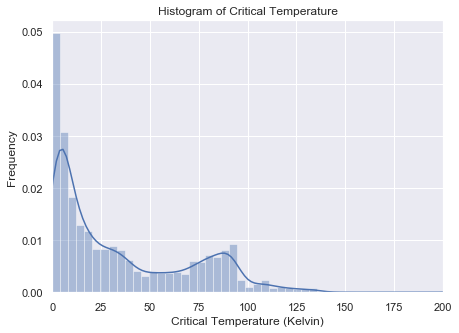

In [6]:
plt.figure(figsize=(7,5))
#plt.hist(y)
sns.distplot(y)
plt.xlim(0,200)
plt.xlabel('Critical Temperature (Kelvin)')
plt.ylabel('Frequency')
plt.title('Histogram of Critical Temperature')
plt.show()

#### Clustermap of Correlations

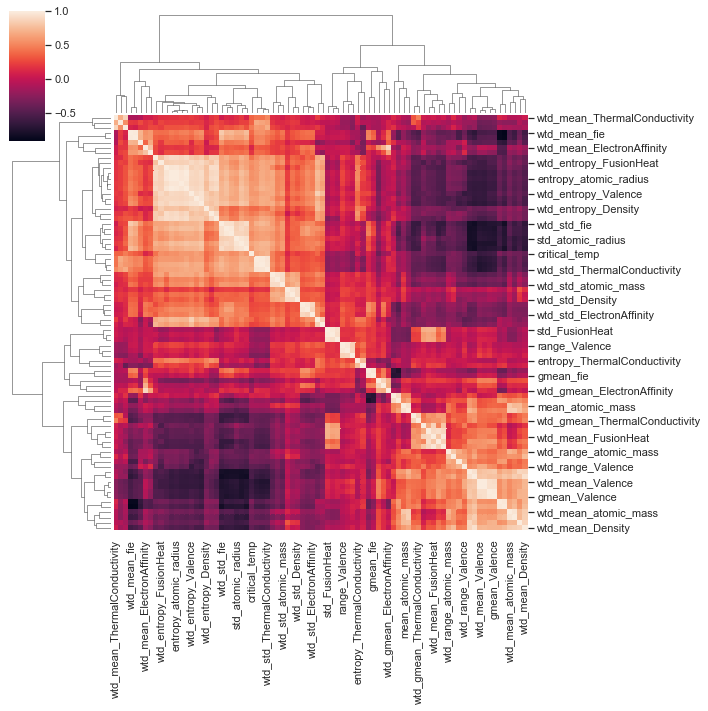

In [42]:
sns.clustermap(df1.corr())
plt.show()

#### Boxplot of the Features

In [35]:
# Get indices of columns with mean feature
col = df1.columns.tolist()
mean_ind = [col.index(i) for i in col if i.startswith('mean_')]
temp_ind = [df1.columns.get_loc('critical_temp')]
indices = mean_ind + temp_ind

[1, 11, 21, 31, 41, 51, 61, 71, 81]

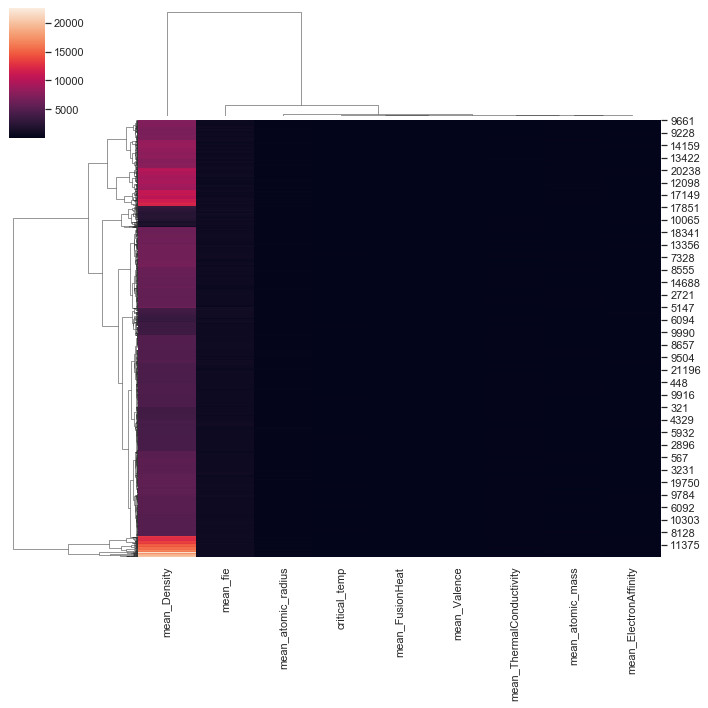

In [43]:
sns.clustermap(df1.iloc[:,indices])

/Users/christinachang/anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


KeyboardInterrupt: 

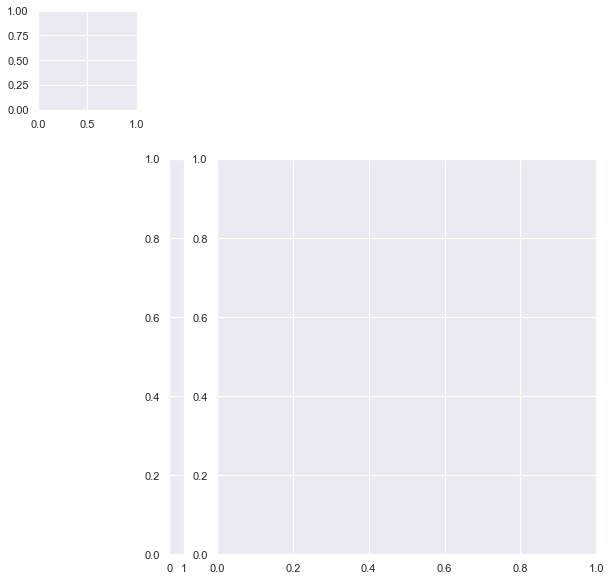

In [10]:
col = df1['critical_temp'].map(dict(zip(df1['critical_temp'].unique(), "rbg")))
sns.clustermap(df1.iloc[:,:-1], standard_scale=1, row_colors=col,method='centroid')
plt.show()

## Classification

#### Feature Selection

In [ ]:
# Normalize the data
X = StandardScaler().fit_transform(X)

In [ ]:
# Reduce the dimensions

In [ ]:
# Train test split

#### Selecting a Model
* Linear Regression
* Support Vector Machine Regression